# **Chest X-ray diagnosis**
### **Abdallah Fekry**
**Model 4**

Covid - Normal - Pneumonia

---

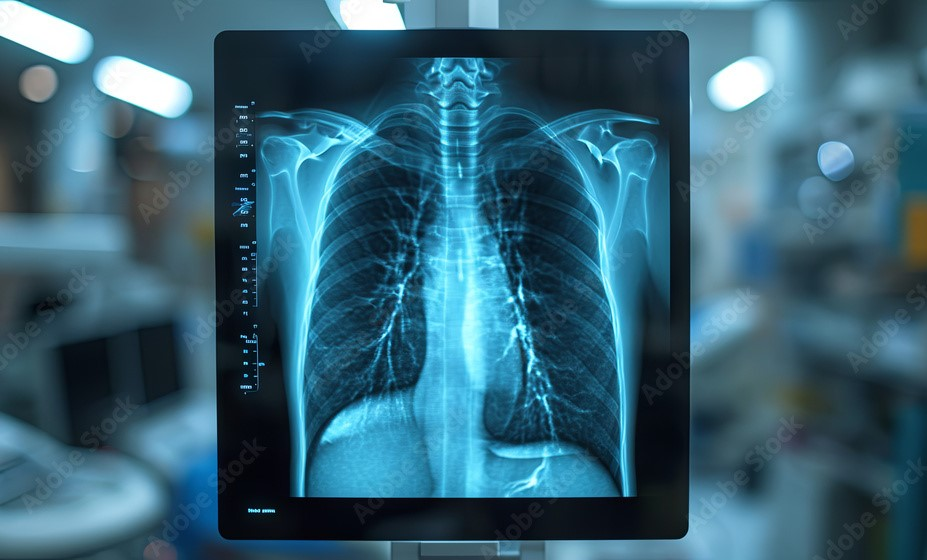

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/kaggle/input/covid-pneumonia-normal/Covid_Pneumonia_Normal/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False)
test_data = train_datagen.flow_from_directory('/kaggle/input/covid-pneumonia-normal/Covid_Pneumonia_Normal/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 5120 images belonging to 3 classes.
Found 108 images belonging to 3 classes.


In [24]:
np.unique(train_data.labels)

array([0, 1, 2], dtype=int32)

In [25]:
train_data.image_shape

(224, 224, 3)

In [27]:
train_data.class_indices

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [81]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [82]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [83]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 134272835 (512.21 MB)
Trainable params: 

In [84]:
train_data.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [85]:
train_data[0][0][2][0].shape

(224, 3)

In [86]:
train_data.samples

5120

In [87]:
test_data.samples

108

In [88]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# from tensorflow import SparseCategoricalCrossentropy
# model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
batch_size=128
from tensorflow import keras
results = model.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
                  )

Epoch 1/100
160/160 [==============================] - 42s 249ms/step - loss: 2.5358 - accuracy: 0.6730 - val_loss: 0.1622 - val_accuracy: 0.9167
Epoch 2/100
160/160 [==============================] - 24s 151ms/step - loss: 0.1803 - accuracy: 0.9363 - val_loss: 0.0727 - val_accuracy: 0.9722
Epoch 3/100
160/160 [==============================] - 24s 150ms/step - loss: 0.1170 - accuracy: 0.9615 - val_loss: 0.1341 - val_accuracy: 0.9352
Epoch 4/100
160/160 [==============================] - 25s 155ms/step - loss: 0.1019 - accuracy: 0.9629 - val_loss: 0.0423 - val_accuracy: 0.9907
Epoch 5/100
160/160 [==============================] - 25s 157ms/step - loss: 0.1073 - accuracy: 0.9639 - val_loss: 0.0238 - val_accuracy: 0.9815
Epoch 6/100
160/160 [==============================] - 25s 153ms/step - loss: 0.0823 - accuracy: 0.9725 - val_loss: 0.0493 - val_accuracy: 0.9815
Epoch 7/100
160/160 [==============================] - 24s 152ms/step - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0805 -

In [89]:
loss , acc =model.evaluate(test_data)
acc

4/4 [==============================] - 1s 105ms/step - loss: 0.0043 - accuracy: 1.0000


1.0

In [92]:
yp = (model.predict(test_data)>=0.5).astype(int)
yp

4/4 [==============================] - 1s 119ms/step


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [93]:
yp.shape

(108, 3)

In [94]:
yp = np.where(yp == 1)[1]
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
yp.shape

(108,)

In [96]:
model.save("model3.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
model.save("model33.keras")

Covid Sample


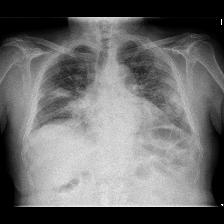

In [71]:
print("Covid Sample")
img_covid = load_img('/kaggle/input/test-images/Covid19_chest_xray.png',target_size=(224,224))
# plt.imshow()
img_covid

Normal Sample


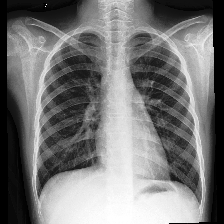

In [72]:
print('Normal Sample')
# img_normal = load_img('/content/normal-chest-x-ray.jpg',target_size=(224,224))
img_normal = load_img('/kaggle/input/test-images/Normal_chest_xray.png',target_size=(224,224))
# plt.imshow(img_normal)
img_normal

Pneumonia Sample


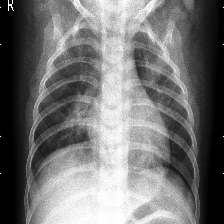

In [73]:
print('Pneumonia Sample')
img_p = load_img('/kaggle/input/test-images/pneumonia_chest_xray.png',target_size=(224,224))
# plt.imshow(img_normal)
img_p

Text(0.5, 1.0, 'Pneumonia')

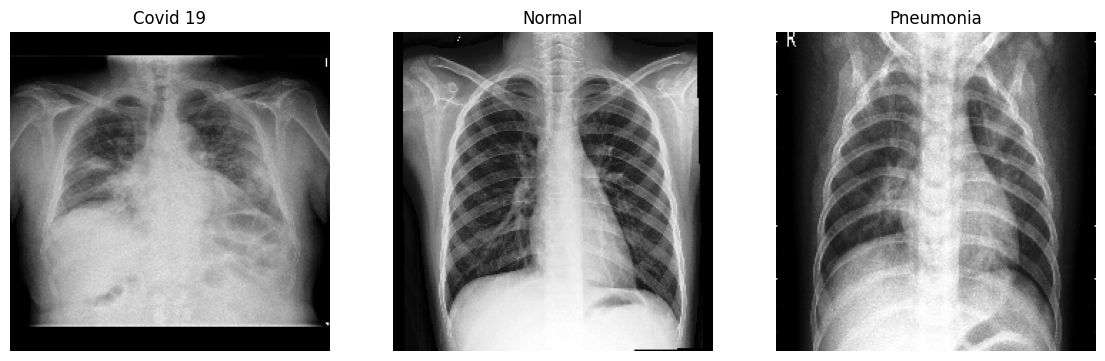

In [74]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img_covid)
plt.title('Covid 19')
fig.add_subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_normal)
plt.title('Normal')
fig.add_subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_p)
plt.title('Pneumonia')

In [75]:
img_covid = img_to_array(img_covid)
img_normal = img_to_array(img_normal)
img_p = img_to_array(img_p)
img_covid = img_covid/255
img_normal = img_normal/255
img_p = img_p/255
img_covid = img_covid.reshape(1,224,224,3)
img_normal = img_normal.reshape(1,224,224,3)
img_p = img_p.reshape(1,224,224,3)
img_normal.shape

(1, 224, 224, 3)

In [98]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,COVID/COVID.png,0,0
1,COVID/COVID_10.png,0,0
2,COVID/COVID_100.png,0,0
3,COVID/COVID_1000.png,0,0
4,COVID/COVID_101.png,0,0
...,...,...,...
103,PNEUMONIA/PNEUMONIA_1057.png,2,2
104,PNEUMONIA/PNEUMONIA_1058.png,2,2
105,PNEUMONIA/PNEUMONIA_1059.png,2,2
106,PNEUMONIA/PNEUMONIA_1060.png,2,2


In [99]:
p1 = (model.predict(img_covid)>=0.5).astype(int).reshape(3,)
p1 = int(np.where(p1 == 1)[0])

if p1 ==0:
  print("Class 0: Covid")
elif p1==1:
  print("Class 1: Normal")
else:
  print('Class 1: Pneumonia')

1/1 [==============================] - 0s 165ms/step
Class 0: Covid


/tmp/ipykernel_34/1273266429.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1 = int(np.where(p1 == 1)[0])


In [78]:
p1 = (model.predict(img_normal)>=0.5).astype(int).reshape(3,)
p1 = int(np.where(p1 == 1)[0])

if p1 ==0:
  print("Class 0: Covid")
elif p1==1:
  print("Class 1: Normal")
else:
  print('Class 1: Pneumonia')

1/1 [==============================] - 0s 21ms/step
Class 1: Normal


/tmp/ipykernel_34/900417450.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1 = int(np.where(p1 == 1)[0])


In [79]:
p1 = (model.predict(img_p)>=0.5).astype(int).reshape(3,)
p1 = int(np.where(p1 == 1)[0])

if p1 ==0:
  print("Class 0: Covid")
elif p1==1:
  print("Class 1: Normal")
else:
  print('Class 2: Pneumonia')

1/1 [==============================] - 0s 25ms/step
Class 2: Pneumonia


/tmp/ipykernel_34/3863665640.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1 = int(np.where(p1 == 1)[0])


In [100]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [101]:
m = confusion_matrix(test_data.labels,yp)
m

array([[36,  0,  0],
       [ 0, 36,  0],
       [ 0,  0, 36]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

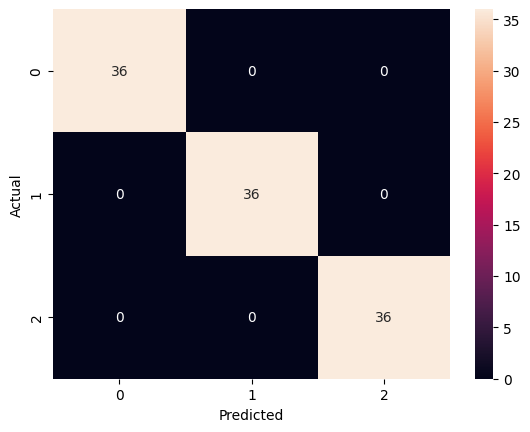

In [102]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True)

In [103]:
from sklearn.metrics import classification_report
classification_report(test_data.labels, yp)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        36\n           1       1.00      1.00      1.00        36\n           2       1.00      1.00      1.00        36\n\n    accuracy                           1.00       108\n   macro avg       1.00      1.00      1.00       108\nweighted avg       1.00      1.00      1.00       108\n'

---